LEVEL 2


Task 1: Restaurant Ratings

Analyze the distribution of aggregate ratings and determine the most common rating range.

Calculate the average number of votes received by restaurants.

In [1]:
pip install pandas matplotlib seaborn geopandas


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Load the CSV file
data = pd.read_csv('/content/Dataset .csv')


In [4]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


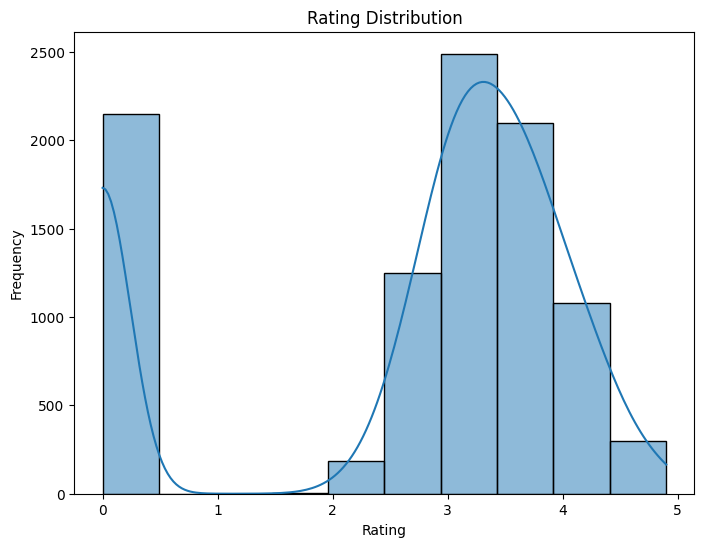

Average number of votes: 156.909747670401


In [5]:
# Rating distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Aggregate rating'], kde=True, bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Average number of votes
average_votes = data['Votes'].mean()
print(f"Average number of votes: {average_votes}")


Task 2: Cuisine Combination

Identify the most common combinations of cuisines in the dataset.

Determine if certain cuisine combinations tend to have higher ratings.

In [6]:
# Find common cuisine combinations
common_combinations = data['Cuisines'].value_counts().nlargest(5)
print("Common Cuisine Combinations:\n", common_combinations)

# Check if certain combinations have higher ratings
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().nlargest(5)
print("Top 5 Cuisine Combinations with highest ratings:\n", cuisine_rating)


Common Cuisine Combinations:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64
Top 5 Cuisine Combinations with highest ratings:
 Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
Name: Aggregate rating, dtype: float64


Task 3: Geographic Analysis

Plot the locations of restaurants on a map using longitude and latitude coordinates.

Identify any patterns or clusters of restaurants in specific areas.

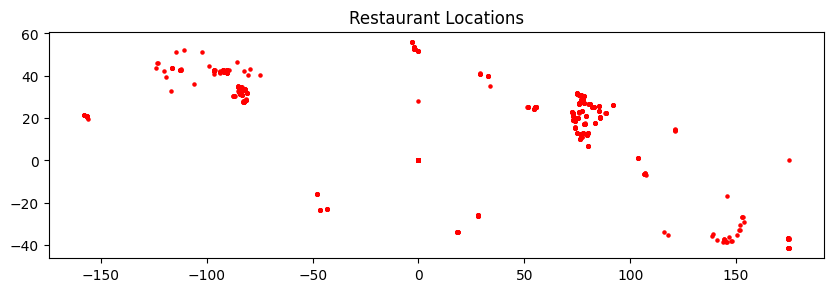

In [9]:
# Create a geopandas dataframe from the dataset
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Plot the locations of the restaurants
gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 10))
plt.title("Restaurant Locations")
plt.show()


<ipython-input-10-6c2a5a367e41>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Get a map of the world


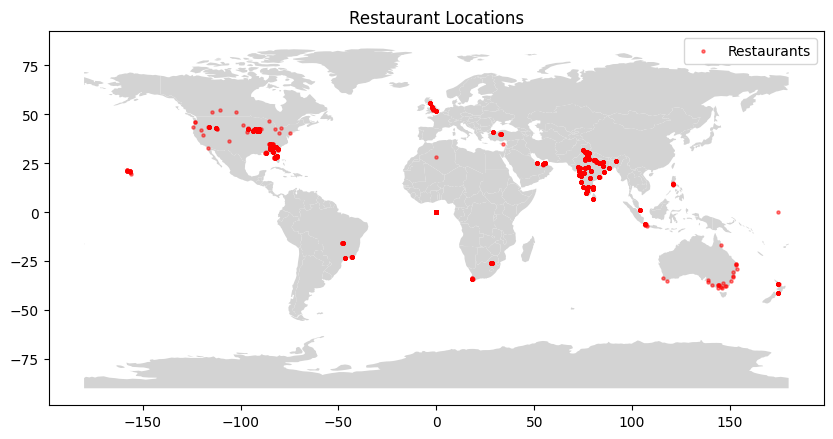

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert longitude and latitude columns into a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the locations of restaurants
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Get a map of the world

fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')

# Plot restaurants on the world map
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5, marker='o', label='Restaurants')

plt.title("Restaurant Locations")
plt.legend()
plt.show()


Task 4: Restaurant Chains

Identify if there are any restaurant chains present in the dataset.

Analyze the ratings and popularity of different restaurant chains.

In [11]:
# Identify restaurant chains
chains = data['Restaurant Name'].value_counts()
popular_chains = chains[chains > 1]  # Assuming a chain has more than one restaurant
print("Popular Restaurant Chains:\n", popular_chains)

# Analyze ratings for chains
chain_ratings = data[data['Restaurant Name'].isin(popular_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()
print("Ratings of popular chains:\n", chain_ratings)


Popular Restaurant Chains:
 Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64
Ratings of popular chains:
 Restaurant Name
10 Downing Street       4.000000
221 B Baker Street      3.366667
34 Parkstreet Lane      3.050000
34, Chowringhee Lane    2.791667
4700BC Popcorn          3.500000
                          ...   
Zaika                   2.850000
Zaika Kathi Rolls       1.500000
Zizo                    3.866667
Zooby's Kitchen         3.150000
bu��no                  3.750000
Name: Aggregate rating, Length: 734, dtype: float64
